<a href="https://colab.research.google.com/github/runo313/runo313/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

(569, 30)


In [ ]:
breast_input = pd.DataFrame(X)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Problem 1**

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465


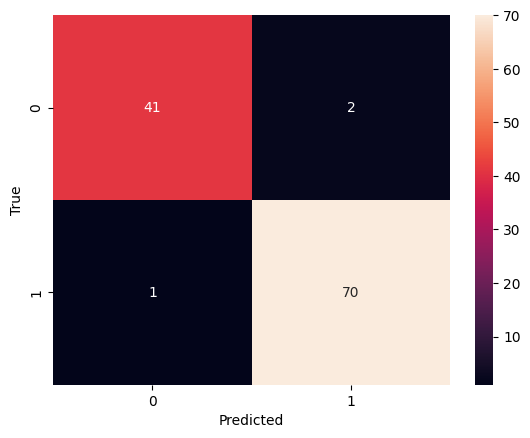

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, Y_train)

# Making predictions
Y_pred = logreg.predict(X_test_scaled)

# Evaluating the model
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}")

# Plotting the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Regularized Model - Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0


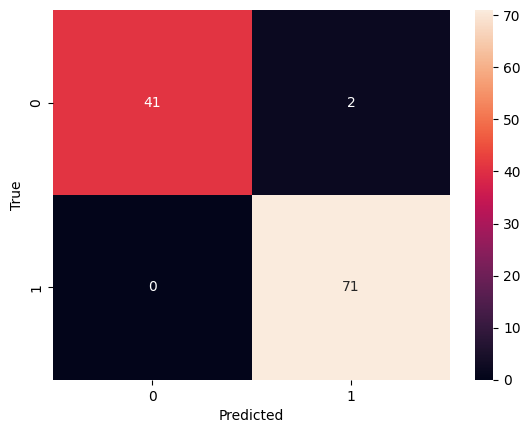

In [ ]:
# Training the logistic regression model with regularization
logreg_reg = LogisticRegression(C=0.1)  # Setting C to a lower value implies stronger regularization
logreg_reg.fit(X_train_scaled, Y_train)

# Making predictions with the regularized model
Y_pred_reg = logreg_reg.predict(X_test_scaled)

# Evaluating the regularized model
accuracy_reg = metrics.accuracy_score(Y_test, Y_pred_reg)
precision_reg = metrics.precision_score(Y_test, Y_pred_reg)
recall_reg = metrics.recall_score(Y_test, Y_pred_reg)
print(f"Regularized Model - Accuracy: {accuracy_reg}\nPrecision: {precision_reg}\nRecall: {recall_reg}")

# Plotting the confusion matrix for the regularized model
conf_matrix_reg = confusion_matrix(Y_test, Y_pred_reg)
sns.heatmap(conf_matrix_reg, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Problem 2

In [ ]:
# Assuming the data split (X_train_scaled, X_test_scaled, Y_train, Y_test) from Problem 1 is reused

# Training the Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, Y_train)

# Making predictions
Y_pred_nb = naive_bayes.predict(X_test_scaled)

# Evaluating the Naive Bayes model
accuracy_nb = metrics.accuracy_score(Y_test, Y_pred_nb)
precision_nb = metrics.precision_score(Y_test, Y_pred_nb)
recall_nb = metrics.recall_score(Y_test, Y_pred_nb)
f1_score_nb = metrics.f1_score(Y_test, Y_pred_nb)

print(f"Naive Bayes Model - Accuracy: {accuracy_nb}\nPrecision: {precision_nb}\nRecall: {recall_nb}\nF1 Score: {f1_score_nb}")


Naive Bayes Model - Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


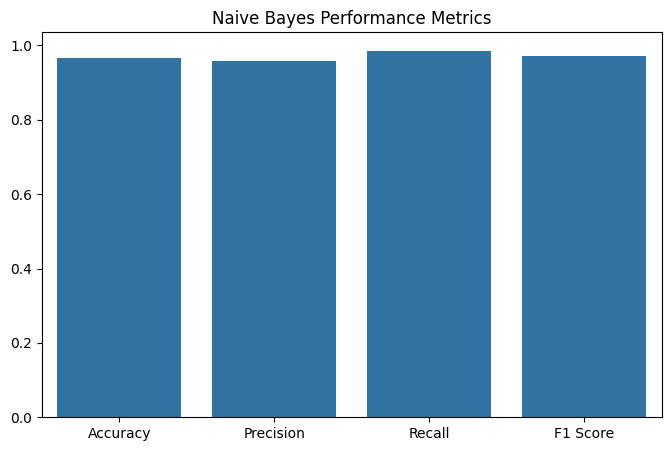

In [ ]:
# Plotting the performance metrics
metrics_nb = [accuracy_nb, precision_nb, recall_nb, f1_score_nb]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics_names, y=metrics_nb)
plt.title('Naive Bayes Performance Metrics')
plt.show()


Problem 3

Optimal number of PCA components: 2


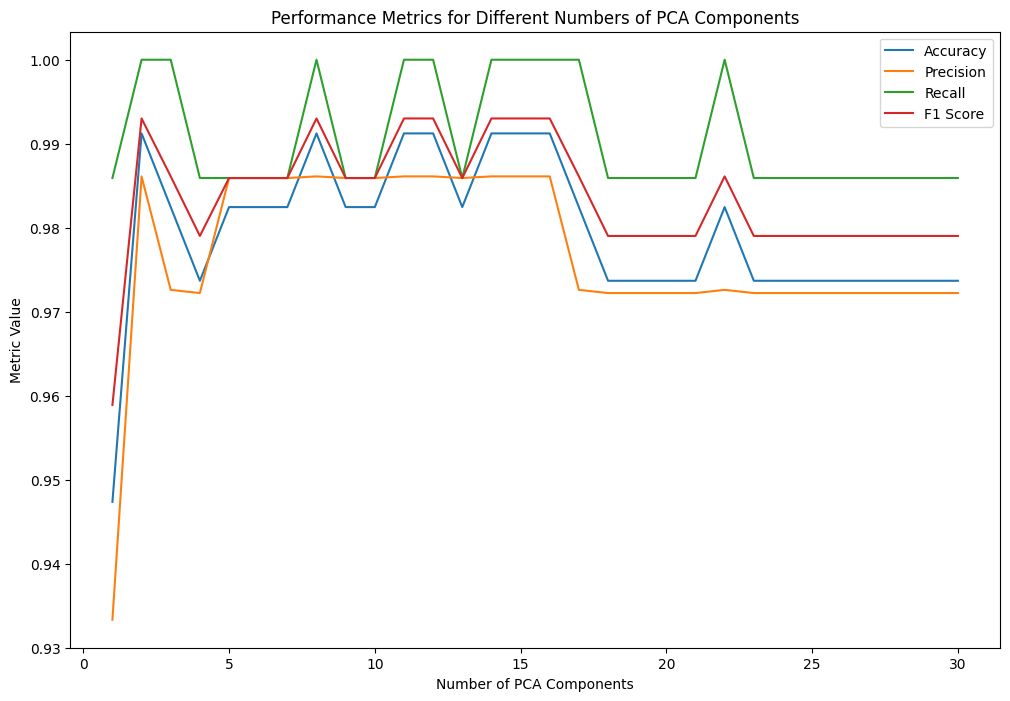

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics storage
metrics_dict = {}

# Looping through different values of K (number of PCA components)
for K in range(1, 31):  # Assuming we want to test up to 30 components
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Logistic Regression model training
    logreg_pca = LogisticRegression()
    logreg_pca.fit(X_train_pca, Y_train)

    # Prediction and metrics evaluation
    Y_pred_pca = logreg_pca.predict(X_test_pca)
    metrics_dict[K] = [accuracy_score(Y_test, Y_pred_pca),
                       precision_score(Y_test, Y_pred_pca),
                       recall_score(Y_test, Y_pred_pca),
                       f1_score(Y_test, Y_pred_pca)]

# Finding the optimal K with the highest accuracy
optimal_K = max(metrics_dict, key=lambda k: metrics_dict[k][0])
print(f"Optimal number of PCA components: {optimal_K}")

# Plotting the performance metrics
plt.figure(figsize=(12, 8))
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score']):
    plt.plot(range(1, 31), [metrics_dict[K][i] for K in range(1, 31)], label=metric)

plt.xlabel('Number of PCA Components')
plt.ylabel('Metric Value')
plt.title('Performance Metrics for Different Numbers of PCA Components')
plt.legend()
plt.show()



Problem 4

Optimal number of PCA components for Naive Bayes: 2


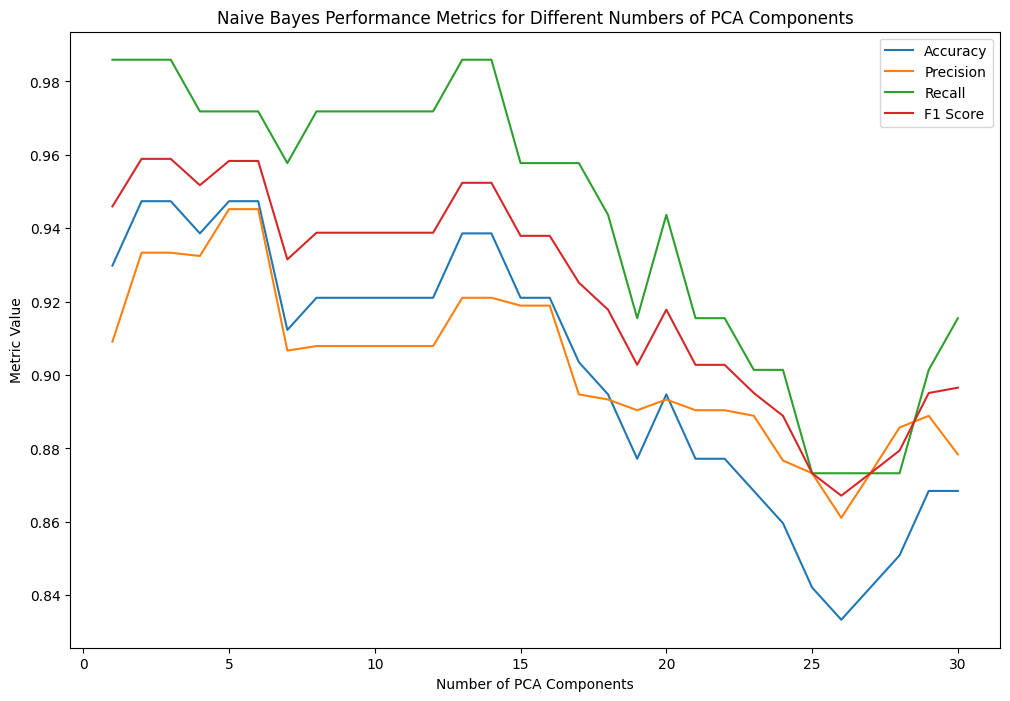

In [ ]:
# Metrics storage for Naive Bayes
metrics_dict_nb = {}

# Looping through different values of K (number of PCA components)
for K in range(1, 31):  # Assuming we want to test up to 30 components
    pca_nb = PCA(n_components=K)
    X_train_pca_nb = pca_nb.fit_transform(X_train_scaled)
    X_test_pca_nb = pca_nb.transform(X_test_scaled)

    # Naive Bayes model training
    naive_bayes_pca = GaussianNB()
    naive_bayes_pca.fit(X_train_pca_nb, Y_train)

    # Prediction and metrics evaluation
    Y_pred_pca_nb = naive_bayes_pca.predict(X_test_pca_nb)
    metrics_dict_nb[K] = [accuracy_score(Y_test, Y_pred_pca_nb),
                          precision_score(Y_test, Y_pred_pca_nb),
                          recall_score(Y_test, Y_pred_pca_nb),
                          f1_score(Y_test, Y_pred_pca_nb)]

# Finding the optimal K with the highest accuracy for Naive Bayes
optimal_K_nb = max(metrics_dict_nb, key=lambda k: metrics_dict_nb[k][0])
print(f"Optimal number of PCA components for Naive Bayes: {optimal_K_nb}")

# Plotting the performance metrics for Naive Bayes
plt.figure(figsize=(12, 8))
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score']):
    plt.plot(range(1, 31), [metrics_dict_nb[K][i] for K in range(1, 31)], label=metric)

plt.xlabel('Number of PCA Components')
plt.ylabel('Metric Value')
plt.title('Naive Bayes Performance Metrics for Different Numbers of PCA Components')
plt.legend()
plt.show()
